# «Предпосылки Гаусса-Маркова. Проверка нормальности случайных отклонений»

# Выполнил:
# Радайкин Артём, ПМ20-4 

## Загружаем данные

In [ ]:
install.packages('stats')
library('stats')

install.packages('tseries')
library('tseries')

install.packages('nortest')
library('nortest')

install.packages('lmtest')
library('lmtest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
df = read.csv('Семинар_5.csv', header=TRUE, sep=';', dec=',', encoding='UTF-8')
head(df,n=5)

,Year,Y,X
,<int>,<int>,<int>
1,1,310,390
2,2,350,385
3,3,330,545
4,4,425,680
5,5,502,810


# Задания:

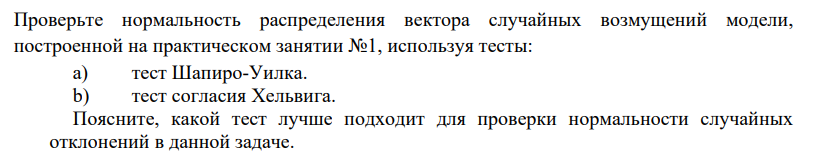

In [ ]:
model = lm(Y ~ X, data=df)

In [ ]:
summary(model)


Call:
lm(formula = Y ~ X, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-98.63 -31.43  11.36  30.92  56.70 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 132.15466   41.79864   3.162  0.00452 ** 
X             0.41856    0.06224   6.725 9.27e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 40.5 on 22 degrees of freedom
Multiple R-squared:  0.6728,	Adjusted R-squared:  0.6579 
F-statistic: 45.23 on 1 and 22 DF,  p-value: 9.268e-07


In [ ]:
yi_hat = predict(model)
vector_Se = yi_hat - df[,2]

# Тест Шапиро-Уилка

In [ ]:
shapiro.test(vector_Se)


	Shapiro-Wilk normality test

data:  vector_Se
W = 0.9375, p-value = 0.1435


# Тест согласия Хельвига

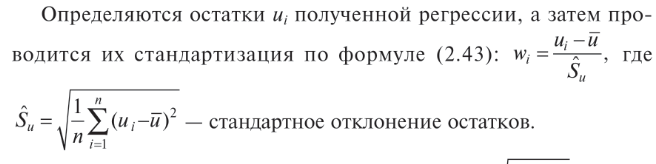

In [ ]:
w_vector = (vector_Se - mean(vector_Se))/sd(vector_Se)
w_vector

1          2          3          4          5          6          7 
-0.3687551 -1.4314686  0.7642554 -0.2076006 -0.7778493  2.4901897  1.0810492 
         8          9         10         11         12         13         14 
-1.1177753  0.4943263  1.2369170  0.8816457 -0.6685460 -0.3749560  0.1505426 
        15         16         17         18         19         20         21 
 1.4951299  1.1427305  0.2179678 -0.7890368 -0.2750257 -0.2984581 -0.6714179 
        22         23         24 
-0.9879116 -1.1089310 -0.8770223

In [ ]:
sort(w_vector)

2          8         23         22         24         18          5 
-1.4314686 -1.1177753 -1.1089310 -0.9879116 -0.8770223 -0.7890368 -0.7778493 
        21         12         13          1         20         19          4 
-0.6714179 -0.6685460 -0.3749560 -0.3687551 -0.2984581 -0.2750257 -0.2076006 
        14         17          9          3         11          7         16 
 0.1505426  0.2179678  0.4943263  0.7642554  0.8816457  1.0810492  1.1427305 
        10         15          6 
 1.2369170  1.4951299  2.4901897

## **Выводы:**


Тест Шапиро-Уилка будет лучше всего подходить для нашей задачи, т.к. данные измерены в количественной шкале, а также объём выборки небольшой, < 50.
По результатам этого теста p-value = 0.1435 > 0.05 и гипотеза H0 о том, что вектор случайных отклонений модели имеет нормальное распределение - принимается. Это и будет мой окончательный вывод по данной задаче. 